In [1]:
!python ../setup.py build_ext --inplace

running build_ext
copying build/lib.macosx-10.9-x86_64-cpython-38/agent_timestep_plasticity.cpython-38-darwin.so -> 
running build_ext
copying build/lib.macosx-10.9-x86_64-cpython-38/agent_timestep_stop_signal.cpython-38-darwin.so -> 
/Users/cristina/Desktop/CBGTpy_sonoma/CBGTPy/notebooks/agent_timestep_stop_signal.cpython-38-darwin.so
/Users/cristina/Desktop/CBGTpy_sonoma/CBGTPy/notebooks/agent_timestep_plasticity.cpython-38-darwin.so


In [2]:
import sys
sys.path.append('../')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import importlib
import pickle
import seaborn as sns
import pathos.multiprocessing
import gc

#Importing scripts:

#Import relevant frames:
import common.cbgt as cbgt
import common.pipeline_creation as pl_creat

#Import plotting functions:
import common.plotting_functions as plt_func
import common.plotting_helper_functions as plt_help
import common.postprocessing_helpers as post_help


In [3]:
def saveresults_vars(variable, prefix):
    pickle.dump(variable, open(prefix, 'wb'))
    
def loadresults_vars(prefix):
    return pickle.load(open(prefix, "rb"))

## P(stop) across test cases

In [57]:
data_dir = "../Results/Data_results/sims_test-cases_300/"
figure_dir = "../Results/Figures_results/sims_test-cases_300/"
figure_dir_new = "../Results/Experimental_results/"

In [58]:
datatables_go = loadresults_vars(data_dir+'datatables_total/datatables_total_go')
#datatables_stn = loadresults_vars(data_dir+'datatables_total/datatables_total_STN-only')
datatables_stn_06 = loadresults_vars(data_dir+'datatables_total/datatables_total_STN_06')
datatables_gpea = loadresults_vars(data_dir+'datatables_total/datatables_total_GPeA-only')
datatables_ispn = loadresults_vars(data_dir+'datatables_total/datatables_total_iSPN-only')
datatables_stn_gpea = loadresults_vars(data_dir+'datatables_total/datatables_total_STN+GPeA')
datatables_ispn_gpea = loadresults_vars(data_dir+'datatables_total/datatables_total_iSPN+GPeA')
datatables_ispn_stn = loadresults_vars(data_dir+'datatables_total/datatables_total_STN+iSPN')
datatables_ispn_stn_gpea = loadresults_vars(data_dir+'datatables_total/datatables_total_iSPN+STN+GPeA')

In [59]:
p_stop_go = loadresults_vars(data_dir+'p_stop_average/p_stop_average_go')
#p_stop_stn = loadresults_vars(data_dir+'p_stop_average/p_stop_average_STN-only')
p_stop_stn_06 = loadresults_vars(data_dir+'p_stop_average/p_stop_average_STN_06')
p_stop_gpea = loadresults_vars(data_dir+'p_stop_average/p_stop_average_GPeA-only')
p_stop_ispn = loadresults_vars(data_dir+'p_stop_average/p_stop_average_iSPN-only')
p_stop_stn_gpea = loadresults_vars(data_dir+'p_stop_average/p_stop_average_STN+GPeA')
p_stop_ispn_gpea = loadresults_vars(data_dir+'p_stop_average/p_stop_average_iSPN+GPeA')
p_stop_ispn_stn = loadresults_vars(data_dir+'p_stop_average/p_stop_average_STN+iSPN')
p_stop_ispn_stn_gpea = loadresults_vars(data_dir+'p_stop_average/p_stop_average_iSPN+STN+GPeA')

In [60]:
p_stop_total = pd.DataFrame()
p_stop_go = p_stop_go.rename({'p_stop': 'Go'}, axis=1)
#p_stop_stn = p_stop_stn.rename({'p_stop': 'STN-only'}, axis=1)
p_stop_stn_06 = p_stop_stn_06.rename({'p_stop': 'STN-only'}, axis=1)
p_stop_gpea = p_stop_gpea.rename({'p_stop': 'GPeA-only'}, axis=1)
p_stop_ispn = p_stop_ispn.rename({'p_stop': 'iSPN-only'}, axis=1)
p_stop_stn_gpea = p_stop_stn_gpea.rename({'p_stop': 'STN+GPeA'}, axis=1)
p_stop_ispn_gpea = p_stop_ispn_gpea.rename({'p_stop': 'iSPN+GPeA'}, axis=1)
p_stop_stn_ispn = p_stop_ispn_stn.rename({'p_stop': 'STN+iSPN'}, axis=1)
p_stop_ispn_stn_gpea = p_stop_ispn_stn_gpea.rename({'p_stop': 'iSPN+STN+GPeA'}, axis=1)
p_stop_total = pd.concat([p_stop_go['Go'], p_stop_stn_06['STN-only'], 
                          p_stop_gpea['GPeA-only'], p_stop_ispn['iSPN-only'], 
                          p_stop_ispn_gpea['iSPN+GPeA'], p_stop_stn_gpea['STN+GPeA'],
                          p_stop_stn_ispn['STN+iSPN'], p_stop_ispn_stn_gpea['iSPN+STN+GPeA']], 
                          axis=1 )

In [61]:
p_stop_total

,Go,STN-only,GPeA-only,iSPN-only,iSPN+GPeA,STN+GPeA,STN+iSPN,iSPN+STN+GPeA
0,0.033333,0.066667,0.466667,0.766667,0.600000,0.366667,0.600000,0.833333
1,0.066667,0.233333,0.466667,0.633333,0.600000,0.466667,0.700000,0.800000
2,0.000000,0.166667,0.500000,0.600000,0.533333,0.466667,0.833333,0.833333
3,0.066667,0.100000,0.300000,0.800000,0.633333,0.566667,0.666667,0.600000
4,0.033333,0.000000,0.333333,0.666667,0.633333,0.466667,0.533333,0.800000
5,0.033333,0.133333,0.466667,0.700000,0.700000,0.233333,0.633333,0.800000
6,0.033333,0.266667,0.466667,0.733333,0.666667,0.466667,0.766667,0.700000
7,0.033333,0.000000,0.300000,0.700000,0.666667,0.466667,0.633333,0.800000
8,0.066667,0.100000,0.366667,0.800000,0.766667,0.466667,0.900000,0.800000
9,0.000000,0.000000,0.466667,0.700000,0.600000,0.233333,0.600000,0.700000


In [62]:
zero = pd.DataFrame(np.zeros(10))
p_stop_total.insert(4, 'zero1', zero)
p_stop_total.insert(1, 'zero2', zero)
p_stop_total.insert(9, 'zero3', zero)
#p_stop_total.insert(2, 'zero', zero)
p_stop_total

,Go,zero2,STN-only,GPeA-only,iSPN-only,zero1,iSPN+GPeA,STN+GPeA,STN+iSPN,zero3,iSPN+STN+GPeA
0,0.033333,0.0,0.066667,0.466667,0.766667,0.0,0.600000,0.366667,0.600000,0.0,0.833333
1,0.066667,0.0,0.233333,0.466667,0.633333,0.0,0.600000,0.466667,0.700000,0.0,0.800000
2,0.000000,0.0,0.166667,0.500000,0.600000,0.0,0.533333,0.466667,0.833333,0.0,0.833333
3,0.066667,0.0,0.100000,0.300000,0.800000,0.0,0.633333,0.566667,0.666667,0.0,0.600000
4,0.033333,0.0,0.000000,0.333333,0.666667,0.0,0.633333,0.466667,0.533333,0.0,0.800000
5,0.033333,0.0,0.133333,0.466667,0.700000,0.0,0.700000,0.233333,0.633333,0.0,0.800000
6,0.033333,0.0,0.266667,0.466667,0.733333,0.0,0.666667,0.466667,0.766667,0.0,0.700000
7,0.033333,0.0,0.000000,0.300000,0.700000,0.0,0.666667,0.466667,0.633333,0.0,0.800000
8,0.066667,0.0,0.100000,0.366667,0.800000,0.0,0.766667,0.466667,0.900000,0.0,0.800000
9,0.000000,0.0,0.000000,0.466667,0.700000,0.0,0.600000,0.233333,0.600000,0.0,0.700000


In [63]:
columns_titles = ['Go', 'zero1', 'STN-only', 'GPeA-only', 'iSPN-only', 'zero2', 'STN+GPeA', 'iSPN+GPeA', 'STN+iSPN', 'zero3', 'iSPN+STN+GPeA']
p_stop_total=p_stop_total.reindex(columns=columns_titles)
p_stop_total

,Go,zero1,STN-only,GPeA-only,iSPN-only,zero2,STN+GPeA,iSPN+GPeA,STN+iSPN,zero3,iSPN+STN+GPeA
0,0.033333,0.0,0.066667,0.466667,0.766667,0.0,0.366667,0.600000,0.600000,0.0,0.833333
1,0.066667,0.0,0.233333,0.466667,0.633333,0.0,0.466667,0.600000,0.700000,0.0,0.800000
2,0.000000,0.0,0.166667,0.500000,0.600000,0.0,0.466667,0.533333,0.833333,0.0,0.833333
3,0.066667,0.0,0.100000,0.300000,0.800000,0.0,0.566667,0.633333,0.666667,0.0,0.600000
4,0.033333,0.0,0.000000,0.333333,0.666667,0.0,0.466667,0.633333,0.533333,0.0,0.800000
5,0.033333,0.0,0.133333,0.466667,0.700000,0.0,0.233333,0.700000,0.633333,0.0,0.800000
6,0.033333,0.0,0.266667,0.466667,0.733333,0.0,0.466667,0.666667,0.766667,0.0,0.700000
7,0.033333,0.0,0.000000,0.300000,0.700000,0.0,0.466667,0.666667,0.633333,0.0,0.800000
8,0.066667,0.0,0.100000,0.366667,0.800000,0.0,0.466667,0.766667,0.900000,0.0,0.800000
9,0.000000,0.0,0.000000,0.466667,0.700000,0.0,0.233333,0.600000,0.600000,0.0,0.700000


In [51]:
columns_titles = ['Go', 'STN-only', 'GPeA-only', 'iSPN-only', 'STN+GPeA', 'iSPN+GPeA', 'STN+iSPN', 'iSPN+STN+GPeA']
p_stop_total=p_stop_total.reindex(columns=columns_titles)
p_stop_total

,Go,STN-only,GPeA-only,iSPN-only,STN+GPeA,iSPN+GPeA,STN+iSPN,iSPN+STN+GPeA
0,0.033333,0.066667,0.466667,0.766667,0.366667,0.600000,0.600000,0.833333
1,0.066667,0.233333,0.466667,0.633333,0.466667,0.600000,0.700000,0.800000
2,0.000000,0.166667,0.500000,0.600000,0.466667,0.533333,0.833333,0.833333
3,0.066667,0.100000,0.300000,0.800000,0.566667,0.633333,0.666667,0.600000
4,0.033333,0.000000,0.333333,0.666667,0.466667,0.633333,0.533333,0.800000
5,0.033333,0.133333,0.466667,0.700000,0.233333,0.700000,0.633333,0.800000
6,0.033333,0.266667,0.466667,0.733333,0.466667,0.666667,0.766667,0.700000
7,0.033333,0.000000,0.300000,0.700000,0.466667,0.666667,0.633333,0.800000
8,0.066667,0.100000,0.366667,0.800000,0.466667,0.766667,0.900000,0.800000
9,0.000000,0.000000,0.466667,0.700000,0.233333,0.600000,0.600000,0.700000


In [64]:
p_stop_total = p_stop_total.rename({'Go': 'No-Stim'}, axis=1)
p_stop_total = p_stop_total.rename({'GPeA-only': 'Arky-only'}, axis=1)
p_stop_total = p_stop_total.rename({'STN+GPeA': 'STN+Arky'}, axis=1)
p_stop_total = p_stop_total.rename({'iSPN+GPeA': 'iSPN+Arky'}, axis=1)
p_stop_total = p_stop_total.rename({'iSPN+STN+GPeA': 'iSPN+STN+Arky'}, axis=1)

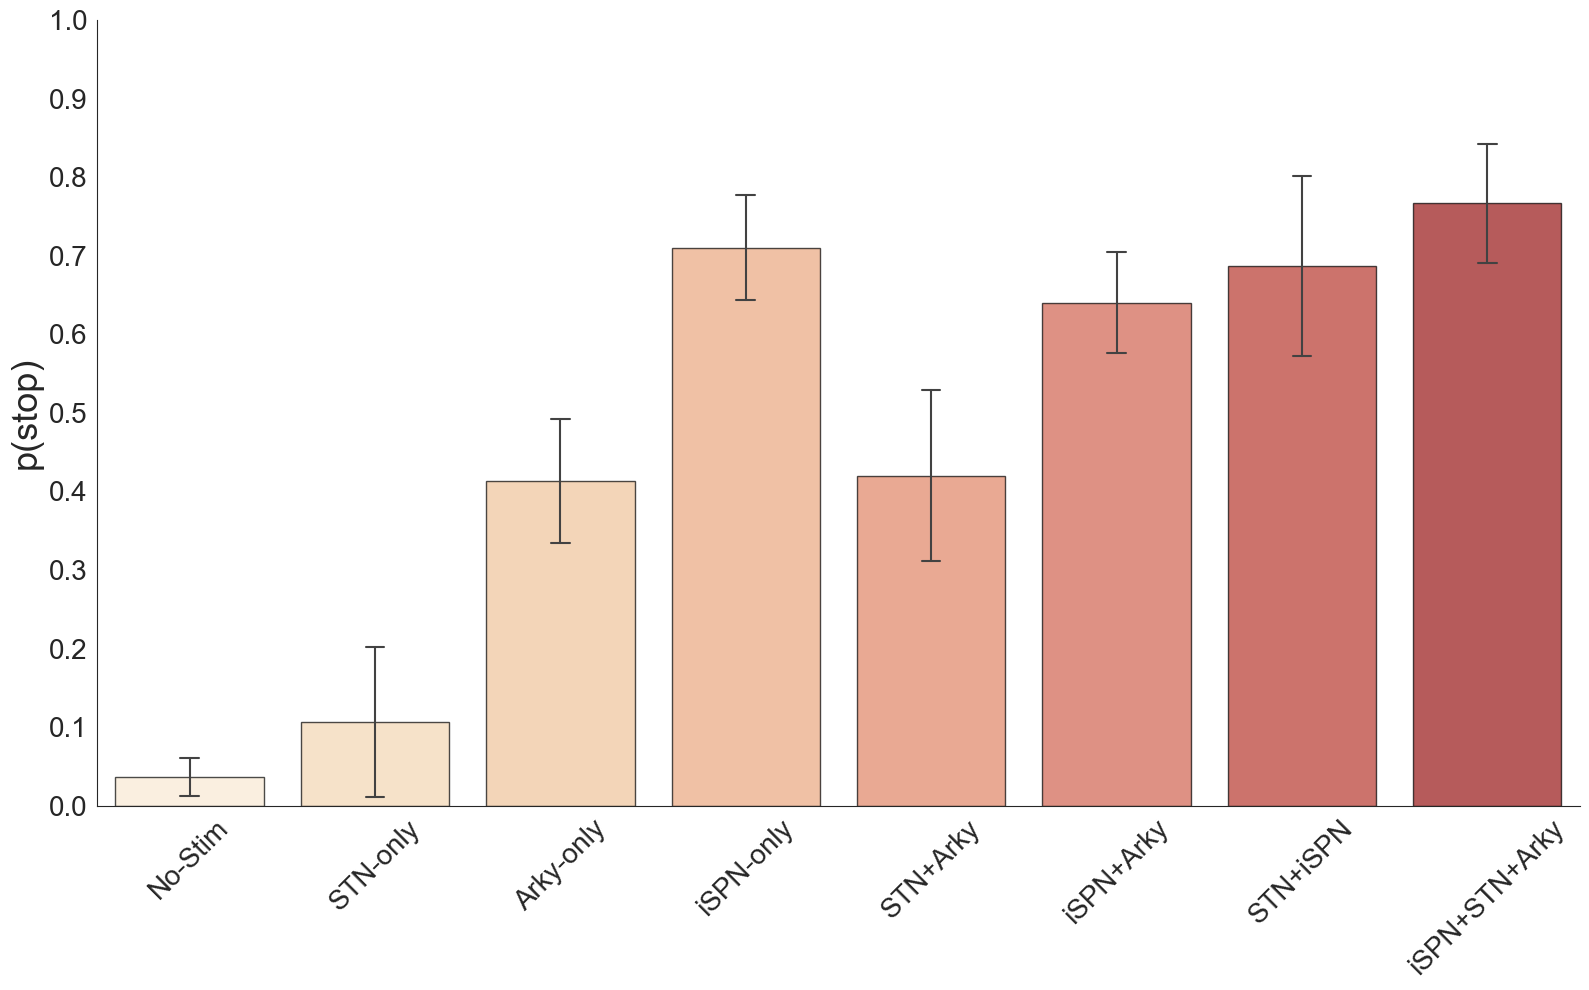

In [55]:
import seaborn as sns

fig, ax = plt.subplots(1,1, figsize=(16,10), tight_layout=True)

#sns.set("paper", font_scale=1.)
#plt.bar(0.5, true, color='thistle', align='center')
sns.barplot(data=p_stop_total, errorbar="sd", alpha=.7, 
            capsize=.1, errwidth=1.5,  palette="OrRd", edgecolor='k')
#sns.barplot(data=p_stop_total, errorbar="sd",
            #capsize=.1, errwidth=2, errcolor=".5", edgecolor=".5", 
            #facecolor=(0, 0, 0, 0), linewidth=2, gist_rainbow)
#palette="OrRd",
ax.set_yticks(np.arange(0, 1.1, 0.1))
ax.set_ylabel('p(stop)', fontsize=26.)
#ax.set_xlabel('Stimulation cases', fontsize=26.)
ax.set_ylim(0,1)
ax.spines[['right', 'top']].set_visible(False)

plt.yticks(fontsize=20)
plt.xticks(fontsize=20, rotation=45)
#ax.bar_label(ax.containers[-1], fmt='Mean:\n%.2f', label_type='center')

plt.savefig(figure_dir_new+'p_stop_total', dpi=300)

In [14]:
p_stop_total

,No-Stim,STN-only,GPeA-only,iSPN-only,STN+GPeA,iSPN+GPeA,STN+iSPN,iSPN+STN+GPeA
0,0.033333,0.066667,0.466667,0.766667,0.366667,0.600000,0.600000,0.833333
1,0.066667,0.233333,0.466667,0.633333,0.466667,0.600000,0.700000,0.800000
2,0.000000,0.166667,0.500000,0.600000,0.466667,0.533333,0.833333,0.833333
3,0.066667,0.100000,0.300000,0.800000,0.566667,0.633333,0.666667,0.600000
4,0.033333,0.000000,0.333333,0.666667,0.466667,0.633333,0.533333,0.800000
5,0.033333,0.133333,0.466667,0.700000,0.233333,0.700000,0.633333,0.800000
6,0.033333,0.266667,0.466667,0.733333,0.466667,0.666667,0.766667,0.700000
7,0.033333,0.000000,0.300000,0.700000,0.466667,0.666667,0.633333,0.800000
8,0.066667,0.100000,0.366667,0.800000,0.466667,0.766667,0.900000,0.800000
9,0.000000,0.000000,0.466667,0.700000,0.233333,0.600000,0.600000,0.700000


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

STN-only v.s. Arky-only: t-test paired samples with Bonferroni correction, P_val=7.665e-06 stat=-1.131e+01
Arky-only v.s. iSPN-only: t-test paired samples with Bonferroni correction, P_val=1.963e-04 stat=-7.616e+00
STN-only v.s. iSPN-only: t-test paired samples with Bonferroni correction, P_val=5.887e-07 stat=-1.524e+01
iSPN-only v.s. iSPN+Arky: t-test paired samples with Bonferroni correction, P_val=2.376e-02 stat=3.841e+00
iSPN+Arky v.s. iSPN+STN+Arky: t-test paired samples with Bonferroni correction, P_val=2.035e-02 stat=-3.943e+00
STN+Arky v.s. iSPN+STN+Arky: t-test paired samples with Bonferroni correction, P_val=2.085e-04 stat=-7.558e+00


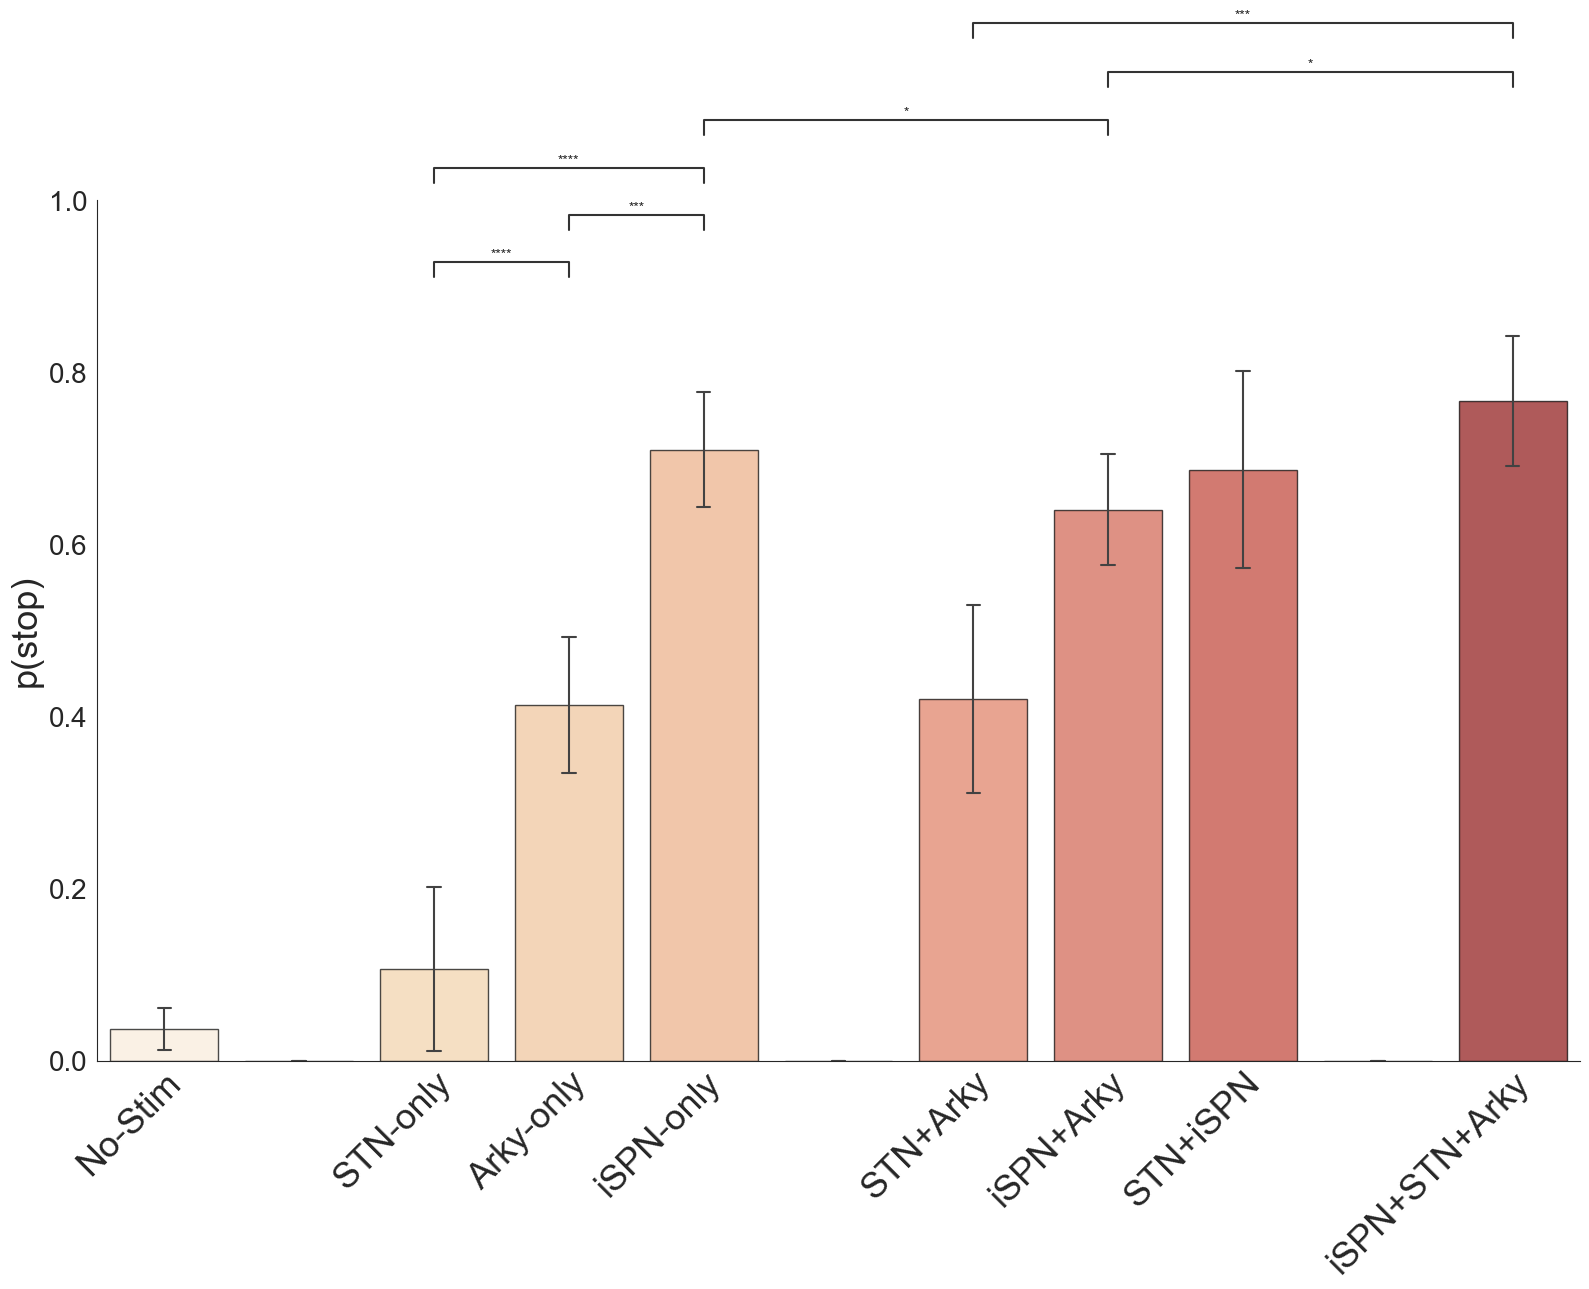

In [67]:
import seaborn as sns
import statannot
from statannot import add_stat_annotation

fig, ax = plt.subplots(1,1, figsize=(16,13), tight_layout=True)


col_order = ['No-Stim', 'zero1', 'STN-only', 'Arky-only', 'iSPN-only', 'zero2', 
              'STN+Arky', 'iSPN+Arky', 'STN+iSPN', 'zero3', 'iSPN+STN+Arky']
ax = sns.barplot(data=p_stop_total, errorbar="sd", alpha=.7, 
            capsize=.1, errwidth=1.5,  palette="OrRd", edgecolor='k', order=col_order)

test_results = add_stat_annotation(ax, data=p_stop_total, order=col_order,
                                   box_pairs=[("STN-only", "Arky-only"), 
                                              ("STN-only", "iSPN-only"),
                                              ("Arky-only", "iSPN-only"), 
                                              ("STN+Arky", "iSPN+STN+Arky"),  
                                              ("iSPN-only", "iSPN+Arky"), 
                                              ("iSPN+STN+Arky", "iSPN+Arky")],
                                   test='t-test_paired', text_format='star',
                                   loc='outside', verbose=2)
test_results


#ax.set_yticks(np.arange(0, 1.1, 0.1))
ax.set_ylabel('p(stop)', fontsize=26.)
#ax.set_xlabel('Test cases', fontsize=20.)
ax.set_ylim(0,1)
ax.spines[['right', 'top']].set_visible(False)

#ax.bar_label(ax.containers[-1], fmt='Mean:\n%.2f', label_type='center')

plt.yticks(fontsize=20)
plt.xticks(fontsize=26, rotation=45)

labels = ['No-Stim', '', 'STN-only', 'Arky-only', 'iSPN-only', '',  'STN+Arky', 'iSPN+Arky', 'STN+iSPN', '', 'iSPN+STN+Arky']
#ax.set_xticklabels(labels)
ax.set_xticklabels(labels, rotation=45, ha='right', rotation_mode='anchor')
ax.tick_params(length=0, axis='x')
#ax.set_xlabel(" ", fontsize=10)
#plt.setp(ax.get_xticklabels(), rotation=45)

#ax.bar_label(ax.containers[-1], fmt='Mean:\n%.2f', label_type='center')

plt.savefig(figure_dir_new+'p_stop_total_new-stn_statannot_ttest_paired', dpi=300)

STN-only v.s. GPeA-only: t-test independent samples with Bonferroni correction, P_val=1.966e-06 stat=-7.838e+00
GPeA-only v.s. iSPN-only: t-test independent samples with Bonferroni correction, P_val=2.322e-07 stat=-9.078e+00
iSPN-only v.s. iSPN+GPeA: t-test independent samples with Bonferroni correction, P_val=1.693e-01 stat=2.386e+00
STN-only v.s. iSPN-only: t-test independent samples with Bonferroni correction, P_val=1.732e-11 stat=-1.639e+01
STN+GPeA v.s. iSPN+STN+GPeA: t-test independent samples with Bonferroni correction, P_val=9.168e-07 stat=-8.268e+00
iSPN-only v.s. iSPN+STN+GPeA: t-test independent samples with Bonferroni correction, P_val=5.519e-01 stat=-1.780e+00


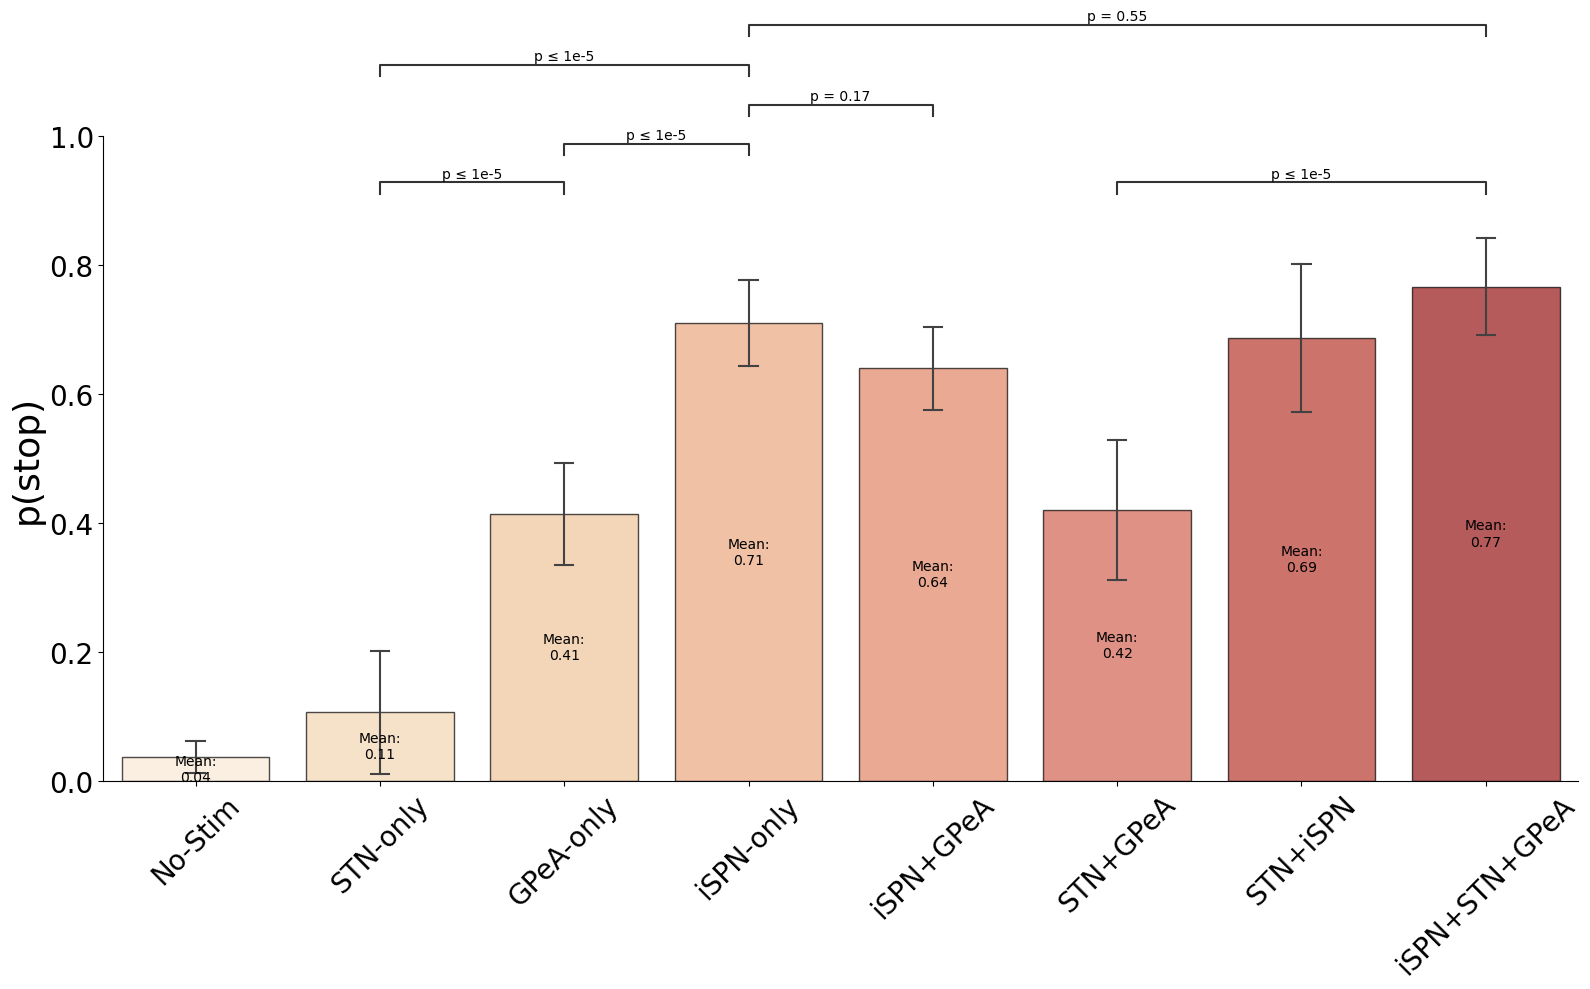

In [39]:
import seaborn as sns
import statannot
from statannot import add_stat_annotation

fig, ax = plt.subplots(1,1, figsize=(16,10), tight_layout=True)


col_order = ['No-Stim', 'STN-only', 'GPeA-only', 'iSPN-only', 
              'iSPN+GPeA', 'STN+GPeA', 'STN+iSPN', 'iSPN+STN+GPeA']
ax = sns.barplot(data=p_stop_total, errorbar="sd", alpha=.7, 
            capsize=.1, errwidth=1.5,  palette="OrRd", edgecolor='k', order=col_order)

test_results = add_stat_annotation(ax, data=p_stop_total, order=col_order,
                                   box_pairs=[("STN-only", "GPeA-only"), 
                                              ("STN-only", "iSPN-only"),
                                              ("GPeA-only", "iSPN-only"), 
                                              ("iSPN-only", "iSPN+STN+GPeA"), 
                                              ("STN+GPeA", "iSPN+STN+GPeA"), 
                                              ("iSPN-only", "iSPN+GPeA")],
                                   test='t-test_ind', text_format='simple',
                                   loc='outside', verbose=2)
test_results


#ax.set_yticks(np.arange(0, 1.1, 0.1))
ax.set_ylabel('p(stop)', fontsize=26.)
#ax.set_xlabel('Test cases', fontsize=20.)
ax.set_ylim(0,1)
ax.spines[['right', 'top']].set_visible(False)

ax.bar_label(ax.containers[-1], fmt='Mean:\n%.2f', label_type='center')

plt.yticks(fontsize=20)
plt.xticks(fontsize=20, rotation=45)
#ax.bar_label(ax.containers[-1], fmt='Mean:\n%.2f', label_type='center')

plt.savefig(figure_dir_new+'p_stop_total_new-stn_statannot_ttest', dpi=300)

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

STN-only v.s. GPeA-only: t-test independent samples with Bonferroni correction, P_val=1.966e-06 stat=-7.838e+00
GPeA-only v.s. iSPN-only: t-test independent samples with Bonferroni correction, P_val=2.322e-07 stat=-9.078e+00
iSPN-only v.s. iSPN+GPeA: t-test independent samples with Bonferroni correction, P_val=1.693e-01 stat=2.386e+00
STN-only v.s. iSPN-only: t-test independent samples with Bonferroni correction, P_val=1.732e-11 stat=-1.639e+01
STN+GPeA v.s. iSPN+STN+GPeA: t-test independent samples with Bonferroni correction, P_val=9.168e-07 stat=-8.268e+00
iSPN-only v.s. iSPN+STN+GPeA: t-test independent samples with Bonferroni correction, P_val=5.519e-01 stat=-1.780e+00


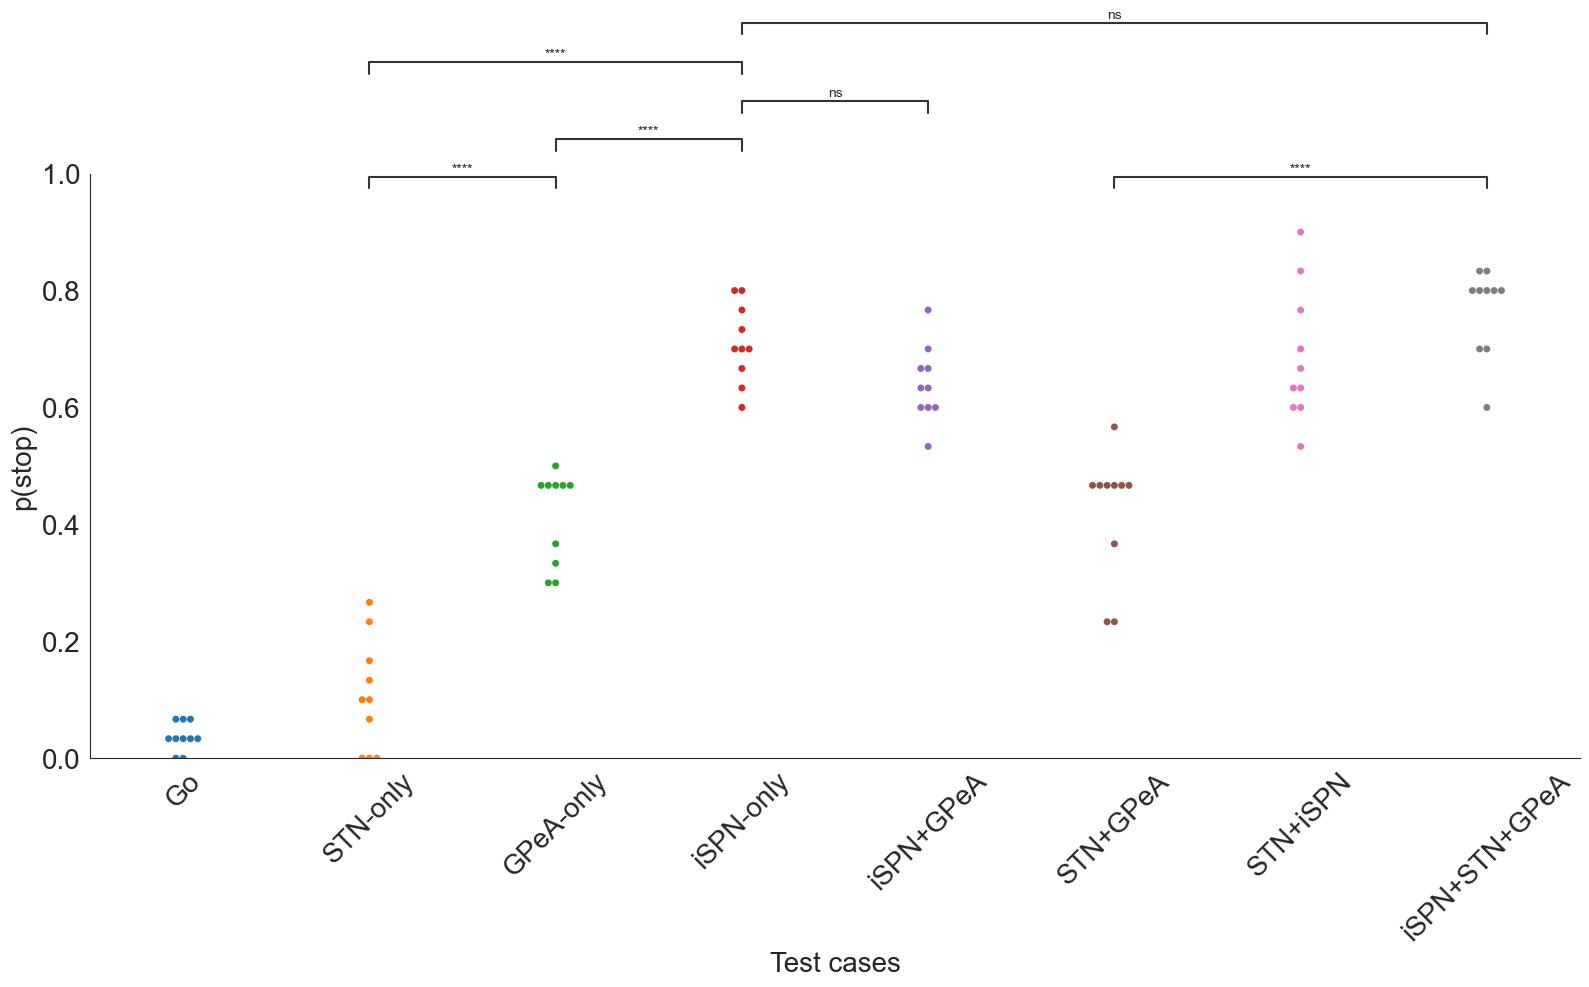

In [108]:
import seaborn as sns
import statannot
from statannot import add_stat_annotation

fig, ax = plt.subplots(1,1, figsize=(16,10), tight_layout=True)


col_order = ['Go', 'STN-only', 'GPeA-only', 'iSPN-only', 
              'iSPN+GPeA', 'STN+GPeA', 'STN+iSPN', 'iSPN+STN+GPeA']
ax = sns.swarmplot(data=p_stop_total, order=col_order)

test_results = add_stat_annotation(ax, data=p_stop_total, order=col_order,
                                   box_pairs=[("STN-only", "GPeA-only"), 
                                              ("STN-only", "iSPN-only"),
                                              ("GPeA-only", "iSPN-only"), 
                                              ("iSPN-only", "iSPN+STN+GPeA"), 
                                              ("STN+GPeA", "iSPN+STN+GPeA"), 
                                              ("iSPN-only", "iSPN+GPeA")],
                                   test='t-test_ind', text_format='star',
                                   loc='outside', verbose=2)
test_results


#ax.set_yticks(np.arange(0, 1.1, 0.1))
ax.set_ylabel('p(stop)', fontsize=20.)
ax.set_xlabel('Test cases', fontsize=20.)
ax.set_ylim(0,1)
ax.spines[['right', 'top']].set_visible(False)

#ax.bar_label(ax.containers[-1], fmt='Mean:\n%.2f', label_type='center')

plt.yticks(fontsize=20)
plt.xticks(fontsize=20, rotation=45)
#ax.bar_label(ax.containers[-1], fmt='Mean:\n%.2f', label_type='center')

plt.savefig(figure_dir_new+'p_stop_total_new-stn_statannot_swarm_ttest', dpi=300)

In [30]:
#ANOVA
from scipy.stats import f_oneway
f_oneway(p_stop_total['No-Stim'],p_stop_total['STN-only'], p_stop_total['GPeA-only'], p_stop_total['iSPN-only'], 
         p_stop_total['iSPN+GPeA'], p_stop_total['STN+GPeA'], p_stop_total['STN+iSPN'], p_stop_total['iSPN+STN+GPeA'])

F_onewayResult(statistic=113.16009962321993, pvalue=2.992620780380894e-36)

In [29]:
p_stop_total.mean()

Go               0.036667
STN-only         0.106667
GPeA-only        0.413333
iSPN-only        0.710000
iSPN+GPeA        0.640000
STN+GPeA         0.420000
STN+iSPN         0.686667
iSPN+STN+GPeA    0.766667
dtype: float64

In [30]:
p_stop_total.std()

Go               0.024595
STN-only         0.095323
GPeA-only        0.078881
iSPN-only        0.066759
iSPN+GPeA        0.064406
STN+GPeA         0.109093
STN+iSPN         0.114612
iSPN+STN+GPeA    0.075359
dtype: float64

In [110]:
data_stats = p_stop_total.agg(['mean', 'std'])
data_stats = data_stats.transpose()
data_stats

,mean,std
Go,0.036667,0.024595
STN-only,0.106667,0.095323
GPeA-only,0.413333,0.078881
iSPN-only,0.710000,0.066759
iSPN+GPeA,0.640000,0.064406
STN+GPeA,0.420000,0.109093
STN+iSPN,0.686667,0.114612
iSPN+STN+GPeA,0.766667,0.075359


In [32]:
p_stop_perc_mean = pd.DataFrame()
p_stop_perc_mean = p_stop_total.div(np.mean(p_stop_total['iSPN+STN+GPeA']))
p_stop_perc_mean

,Go,STN-only,GPeA-only,iSPN-only,iSPN+GPeA,STN+GPeA,STN+iSPN,iSPN+STN+GPeA
0,0.043478,0.086957,0.608696,1.000000,0.782609,0.478261,0.782609,1.086957
1,0.086957,0.304348,0.608696,0.826087,0.782609,0.608696,0.913043,1.043478
2,0.000000,0.217391,0.652174,0.782609,0.695652,0.608696,1.086957,1.086957
3,0.086957,0.130435,0.391304,1.043478,0.826087,0.739130,0.869565,0.782609
4,0.043478,0.000000,0.434783,0.869565,0.826087,0.608696,0.695652,1.043478
5,0.043478,0.173913,0.608696,0.913043,0.913043,0.304348,0.826087,1.043478
6,0.043478,0.347826,0.608696,0.956522,0.869565,0.608696,1.000000,0.913043
7,0.043478,0.000000,0.391304,0.913043,0.869565,0.608696,0.826087,1.043478
8,0.086957,0.130435,0.478261,1.043478,1.000000,0.608696,1.173913,1.043478
9,0.000000,0.000000,0.608696,0.913043,0.782609,0.304348,0.782609,0.913043


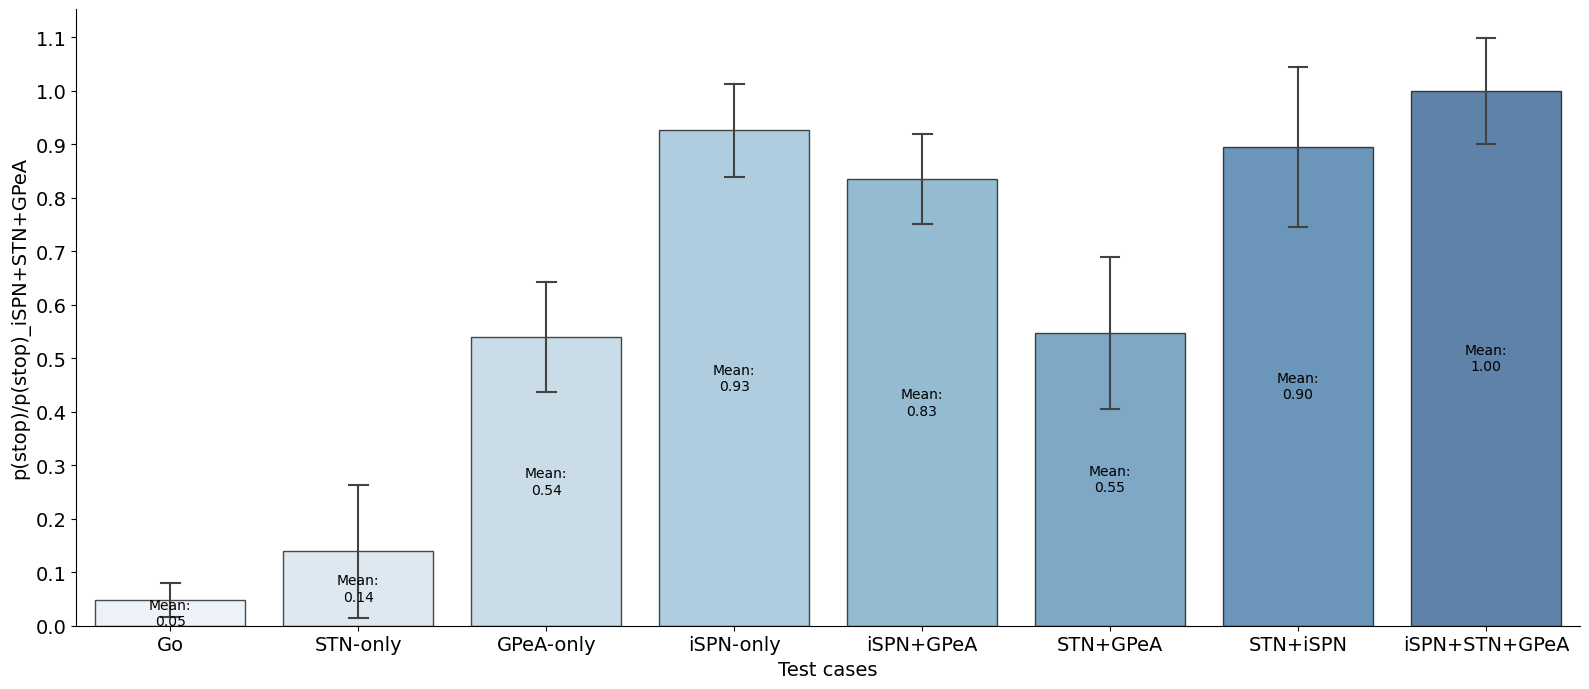

In [33]:
fig, ax = plt.subplots(1,1, figsize=(16,7), tight_layout=True)

#sns.set("paper", font_scale=1.)
#plt.bar(0.5, true, color='thistle', align='center')
sns.barplot(data=p_stop_perc_mean, errorbar="sd", alpha=.7, 
            capsize=.1, errwidth=1.5,  palette="Blues", edgecolor='k')
#sns.barplot(data=p_stop_total, errorbar="sd",
            #capsize=.1, errwidth=2, errcolor=".5", edgecolor=".5", 
            #facecolor=(0, 0, 0, 0), linewidth=2, gist_rainbow)
#palette="OrRd",
ax.set_yticks(np.arange(0, 1.2, 0.1))
ax.set_ylabel('p(stop)/p(stop)_iSPN+STN+GPeA', fontsize=14.)
ax.set_xlabel('Test cases', fontsize=14.)
#ax.set_ylim(0,1)
ax.spines[['right', 'top']].set_visible(False)

plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
ax.bar_label(ax.containers[-1], fmt='Mean:\n%.2f', label_type='center')

plt.savefig(figure_dir+'p_stop_total_fraction', dpi=300)

## RTs across test cases

In [13]:
rt_total = pd.DataFrame()
rt_go = datatables_go.rename({'decisionduration': 'Go'}, axis=1)
rt_stn = datatables_stn_06.rename({'decisionduration': 'STN-only'}, axis=1)
rt_gpea = datatables_gpea.rename({'decisionduration': 'GPeA-only'}, axis=1)
rt_ispn = datatables_ispn.rename({'decisionduration': 'iSPN-only'}, axis=1)
rt_stn_gpea = datatables_stn_gpea.rename({'decisionduration': 'STN+GPeA'}, axis=1)
rt_ispn_gpea = datatables_ispn_gpea.rename({'decisionduration': 'iSPN+GPeA'}, axis=1)
rt_stn_ispn = datatables_ispn_stn.rename({'decisionduration': 'STN+iSPN'}, axis=1)
rt_ispn_stn_gpea = datatables_ispn_stn_gpea.rename({'decisionduration': 'iSPN+STN+GPeA'}, axis=1)
rt_total = pd.concat([rt_go['Go'], rt_stn['STN-only'], rt_gpea['GPeA-only'], rt_ispn['iSPN-only'], 
                   rt_ispn_gpea['iSPN+GPeA'], rt_stn_gpea['STN+GPeA'],rt_stn_ispn['STN+iSPN'],
                   rt_ispn_stn_gpea['iSPN+STN+GPeA']], 
                   axis=1 )

In [14]:
rt_total

,Go,STN-only,GPeA-only,iSPN-only,iSPN+GPeA,STN+GPeA,STN+iSPN,iSPN+STN+GPeA
0,301,174,108,301,287,301,301,301
1,167,301,301,301,301,291,301,301
2,96,162,285,282,283,301,301,301
3,108,76,293,301,289,301,301,301
4,245,96,301,292,301,290,286,301
...,...,...,...,...,...,...,...,...
295,102,166,99,301,301,300,301,301
296,187,92,231,300,301,93,301,301
297,245,141,141,289,301,86,285,301
298,50,108,301,301,75,274,301,301


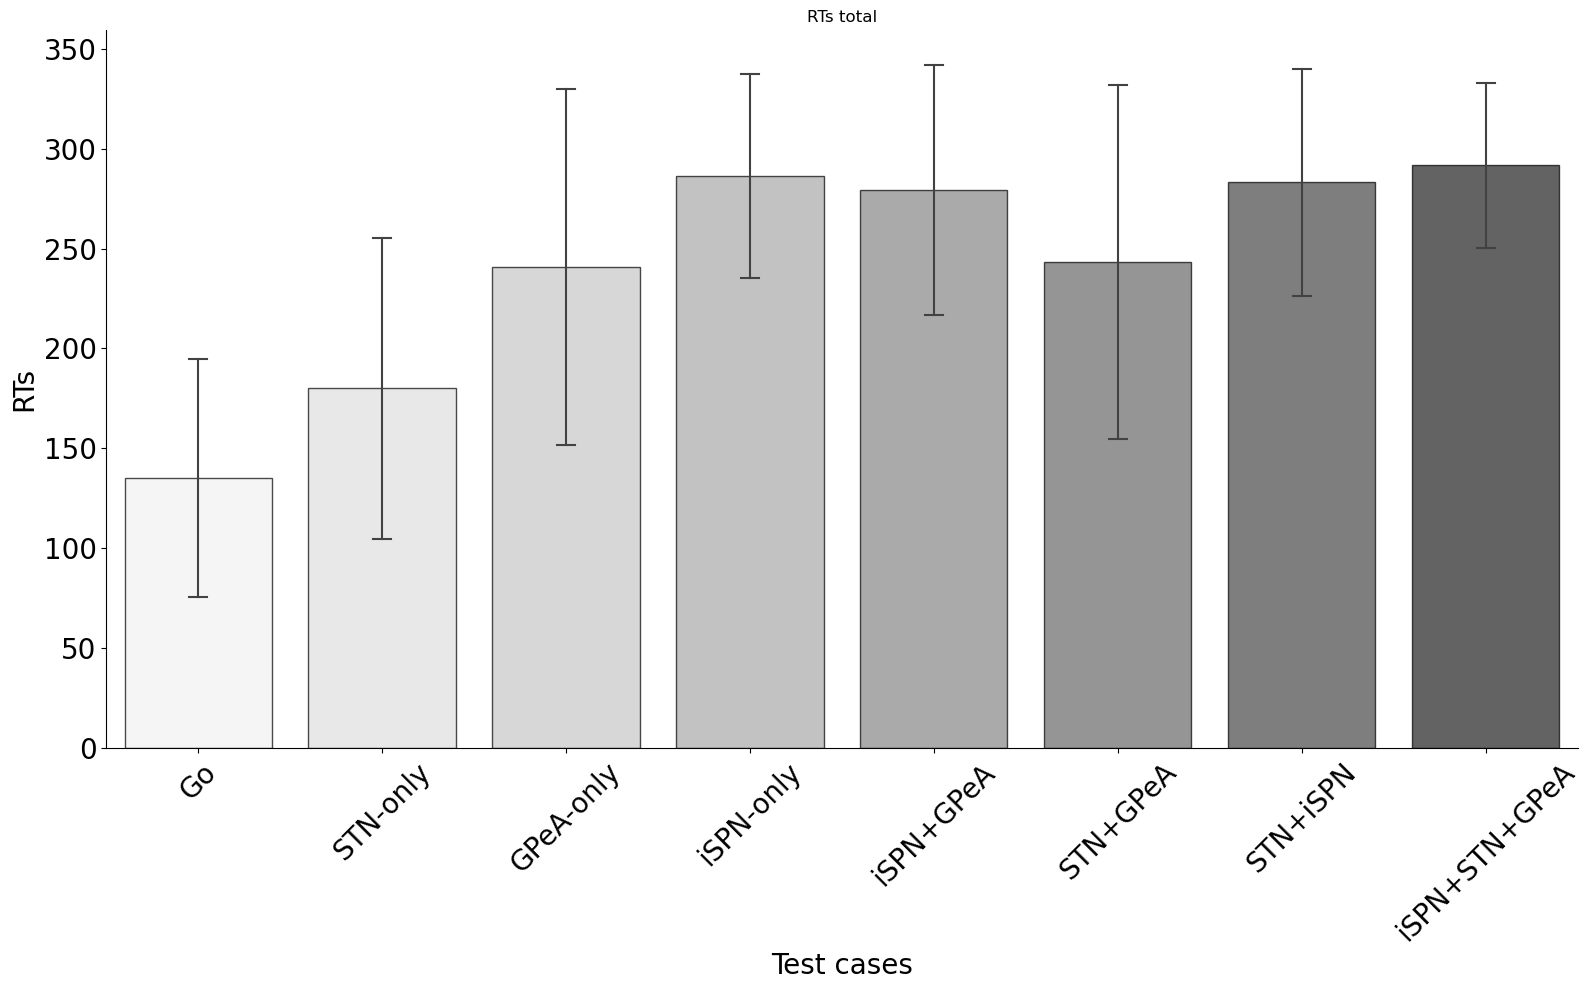

In [19]:
#RTs 

import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1, figsize=(16,10), tight_layout=True)
sns.barplot(data=rt_total, errorbar="sd", alpha=.7, 
            capsize=.1, errwidth=1.5,  palette="Greys", edgecolor='k')

ax.spines[['right', 'top']].set_visible(False)
ax.set_ylabel('RTs', fontsize=20)
ax.set_xlabel('Test cases', fontsize=20)
plt.title('RTs total')

plt.yticks(fontsize=20)
plt.xticks(fontsize=20, rotation=45)

plt.savefig(figure_dir_new+'RTs_total.png', dpi=200)

STN-only v.s. GPeA-only: t-test independent samples with Bonferroni correction, P_val=2.293e-06 stat=-7.838e+00
Go v.s. STN-only: t-test independent samples with Bonferroni correction, P_val=2.611e-01 stat=-2.249e+00
GPeA-only v.s. iSPN-only: t-test independent samples with Bonferroni correction, P_val=2.710e-07 stat=-9.078e+00
iSPN-only v.s. iSPN+GPeA: t-test independent samples with Bonferroni correction, P_val=1.975e-01 stat=2.386e+00
STN-only v.s. iSPN-only: t-test independent samples with Bonferroni correction, P_val=2.021e-11 stat=-1.639e+01
STN+GPeA v.s. iSPN+STN+GPeA: t-test independent samples with Bonferroni correction, P_val=1.070e-06 stat=-8.268e+00
iSPN-only v.s. iSPN+STN+GPeA: t-test independent samples with Bonferroni correction, P_val=6.438e-01 stat=-1.780e+00


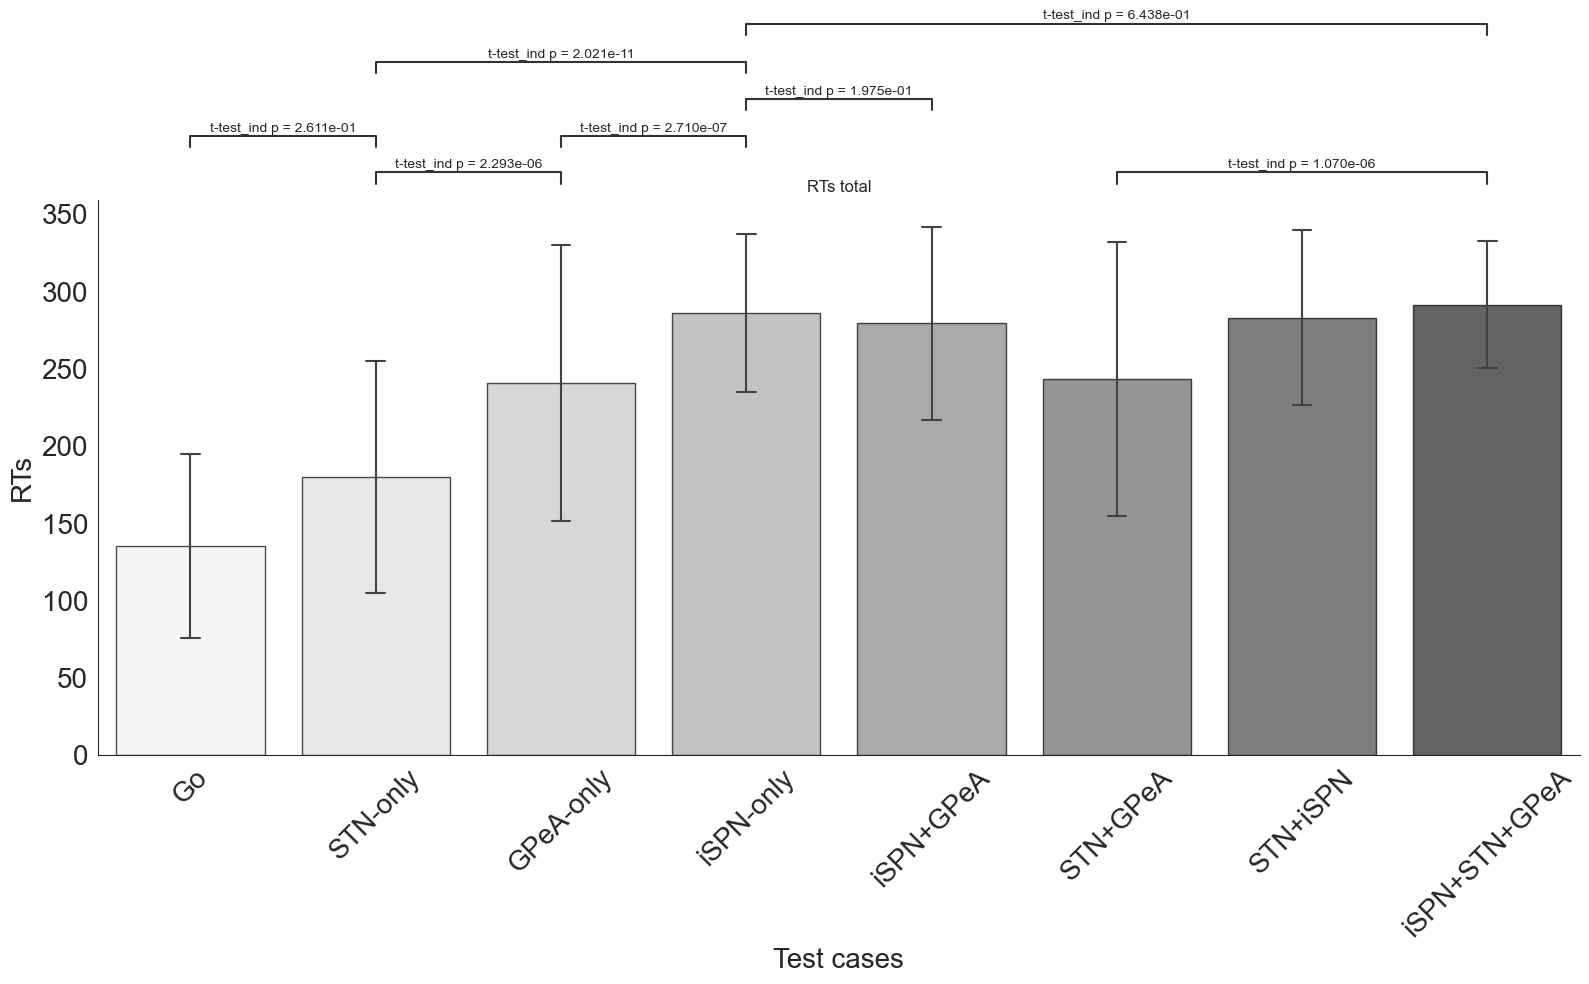

In [52]:
import seaborn as sns
from statannot import add_stat_annotation
import matplotlib.pyplot as plt

col_order = ['Go', 'STN-only', 'GPeA-only', 'iSPN-only', 
              'iSPN+GPeA', 'STN+GPeA', 'STN+iSPN', 'iSPN+STN+GPeA']
fig, ax = plt.subplots(1,1, figsize=(16,10), tight_layout=True)
sns.barplot(data=rt_total, errorbar="sd", alpha=.7, 
            capsize=.1, errwidth=1.5,  palette="Greys", edgecolor='k')

test_results = add_stat_annotation(ax, data=p_stop_total, order=col_order,
                                   box_pairs=[("STN-only", "GPeA-only"), 
                                              ("STN-only", "Go"),
                                              ("STN-only", "iSPN-only"),
                                              ("GPeA-only", "iSPN-only"), 
                                              ("iSPN-only", "iSPN+STN+GPeA"), 
                                              ("STN+GPeA", "iSPN+STN+GPeA"), 
                                              ("iSPN-only", "iSPN+GPeA")],
                                   test='t-test_ind', text_format='full',
                                   loc='outside', verbose=2)

ax.spines[['right', 'top']].set_visible(False)
ax.set_ylabel('RTs', fontsize=20)
ax.set_xlabel('Test cases', fontsize=20)
plt.title('RTs total')

plt.yticks(fontsize=20)
plt.xticks(fontsize=20, rotation=45)

plt.savefig(figure_dir_new+'RTs_total_ttest.png', dpi=200)

## Control vs. lesion analysis

### p(stop)

In [83]:
data_dir = "../Results/Data_results/weights_analysis/lesion-experiments/"
figure_dir = "../Results/Experimental_results/"
figure_dir_new = "../Results/Experimental_results/"

In [94]:
solutions = [0.32, np.round(0.32*2/3, 2), np.round(0.32*1/3, 2), 0.02, 0]
#solutions = [0.065, 0.063, 0.060, 0.065*2/3]
#solutions = [0.065, 0.063, 0.060, 0.065*2/3, 0.065*1/3]
#solutions = [0.12, 0.08, 0.04, 0.02, 0]
#solutions_seed = [0, 5, 6]
#solutions = [0.065, 0.063, 0.06]
#solutions = [0, 0.4]
#solutions = [0.28, 0.22, 0.18, 0.12, 0.09, 0]
print(len(solutions))
print(solutions)

5
[0.32, 0.21, 0.11, 0.02, 0]


In [95]:
datatables = pd.DataFrame()

for i in np.arange(len(solutions)): 

    net = pickle.load(open(data_dir+'GPeA-dSPN/network_data_GPeA-dSPN_weak_'+str(i), 'rb'))
    
    for j in np.arange(len(net)):
        
        temp = net[j]['datatables']
        temp['GPeA'] = solutions[i]
        temp['num_stops'] = [1 if x == 'stop' or x == 'none' else 0 for x in temp.decision]
        temp['seed'] = j
        #temp['p_stop'] = sum(temp['num_stops'].values/70)
        datatables = pd.concat([datatables, temp], ignore_index = False)

datatables['GPeA'] = np.round(datatables['GPeA'].values, 4)
#saveresults_vars(datatables_all, data_dir+'1chann-old/datatables_all')

In [96]:
datatables

,decision,stimulusstarttime,decisiontime,decisionduration,decisiondurationplusdelay,rewardtime,correctdecision,reward,GPeA,num_stops,seed
0,stop,0,301,301,602,602,left,0,0.32,1,0
1,stop,1203,1504,301,602,1805,left,0,0.32,1,0
2,stop,2406,2707,301,602,3008,left,0,0.32,1,0
3,left,3609,3899,290,591,4200,left,1.0,0.32,0,0
4,stop,4801,5102,301,602,5403,left,0,0.32,1,0
...,...,...,...,...,...,...,...,...,...,...,...
25,left,27450,27528,78,379,27829,left,1.0,0.00,0,9
26,left,28430,28493,63,364,28794,left,1.0,0.00,0,9
27,left,29395,29468,73,374,29769,left,1.0,0.00,0,9
28,left,30370,30443,73,374,30744,left,1.0,0.00,0,9


In [97]:
p_stop_average_wts = pd.DataFrame(datatables.groupby(['GPeA', 'seed'])['num_stops'].mean()).reset_index()
p_stop_average_wts = p_stop_average_wts.rename({'num_stops': 'p_stop'}, axis=1)
#saveresults_vars(p_stop_average_wts, data_dir+'GPeA-iSPN/p_stop_average_STN-GPi_wts')
p_stop_average_wts

,GPeA,seed,p_stop
0,0.00,0,0.033333
1,0.00,1,0.033333
2,0.00,2,0.033333
3,0.00,3,0.000000
4,0.00,4,0.000000
5,0.00,5,0.066667
6,0.00,6,0.033333
7,0.00,7,0.100000
8,0.00,8,0.033333
9,0.00,9,0.033333


In [99]:
temp = pd.DataFrame(columns=['seed', '0.32', '0.21',
                            '0.11', '0.02', '0'])
temp['seed'] = np.arange(0, 10, 1)
temp['0.32'] = p_stop_average_wts.iloc[40:].p_stop.values
temp['0.21'] = p_stop_average_wts.iloc[30:40].p_stop.values
temp['0.11'] = p_stop_average_wts.iloc[20:30].p_stop.values
temp['0.02'] = p_stop_average_wts.iloc[10:20].p_stop.values
temp['0'] = p_stop_average_wts.iloc[0:10].p_stop.values
temp

,seed,0.32,0.21,0.11,0.02,0
0,0,0.700000,0.566667,0.233333,0.033333,0.033333
1,1,0.700000,0.433333,0.333333,0.000000,0.033333
2,2,0.733333,0.466667,0.166667,0.100000,0.033333
3,3,0.733333,0.533333,0.133333,0.000000,0.000000
4,4,0.733333,0.533333,0.233333,0.066667,0.000000
5,5,0.700000,0.600000,0.133333,0.000000,0.066667
6,6,0.833333,0.133333,0.366667,0.166667,0.033333
7,7,0.700000,0.433333,0.033333,0.100000,0.100000
8,8,0.766667,0.533333,0.166667,0.033333,0.033333
9,9,0.766667,0.466667,0.066667,0.033333,0.033333


In [89]:
temp

,seed,0.12,0.08,0.04,0.02,0
0,0,0.700000,0.733333,0.866667,0.833333,0.833333
1,1,0.800000,0.600000,0.900000,0.900000,0.866667
2,2,0.800000,0.900000,0.700000,0.833333,0.900000
3,3,0.700000,0.866667,0.733333,0.866667,0.933333
4,4,0.700000,0.800000,0.733333,0.766667,0.833333
5,5,0.800000,0.933333,0.866667,0.833333,0.833333
6,6,0.800000,0.633333,0.733333,0.900000,0.866667
7,7,0.733333,0.700000,0.666667,0.733333,0.900000
8,8,0.566667,0.800000,0.833333,0.800000,0.933333
9,9,0.700000,0.800000,0.933333,0.833333,0.766667


### RTs

In [100]:
rts_average_wts = pd.DataFrame(datatables.groupby(['GPeA', 'seed'])['decisionduration'].mean()).reset_index()
rts_average_wts = rts_average_wts.rename({'decisionduration': 'rt'}, axis=1)
#saveresults_vars(p_stop_average_wts, data_dir+'GPeA-iSPN/p_stop_average_STN-GPi_wts')
rts_average_wts

,GPeA,seed,rt
0,0.00,0,199.833333
1,0.00,1,193.333333
2,0.00,2,194.866667
3,0.00,3,184.233333
4,0.00,4,165.333333
5,0.00,5,205.3
6,0.00,6,182.133333
7,0.00,7,166.1
8,0.00,8,189.966667
9,0.00,9,182.166667


In [101]:
temp_rt = pd.DataFrame(columns=['seed', '0.32', '0.21',
                            '0.11', '0.02', '0'])
temp_rt['seed'] = np.arange(0, 10, 1)
temp_rt['0.32'] = rts_average_wts.iloc[40:50].rt.values
temp_rt['0.21'] = rts_average_wts.iloc[30:40].rt.values
temp_rt['0.11'] = rts_average_wts.iloc[20:30].rt.values
temp_rt['0.02'] = rts_average_wts.iloc[10:20].rt.values
temp_rt['0'] = rts_average_wts.iloc[0:10].rt.values
temp_rt

,seed,0.32,0.21,0.11,0.02,0
0,0,277.066667,261.266667,232.6,189.633333,199.833333
1,1,277.066667,252.9,248.9,205.9,193.333333
2,2,290.466667,245.466667,206.3,186.266667,194.866667
3,3,298.7,267.133333,248.633333,180.3,184.233333
4,4,290.466667,261.333333,242.066667,171.3,165.333333
5,5,270.866667,275.6,211.766667,170.133333,205.3
6,6,285.033333,229.1,278.8,167.533333,182.133333
7,7,283.9,237.3,196.366667,157.233333,166.1
8,8,277.8,275.333333,213.033333,198.833333,189.966667
9,9,285.4,261.266667,155.433333,199.2,182.166667


### Joint plot

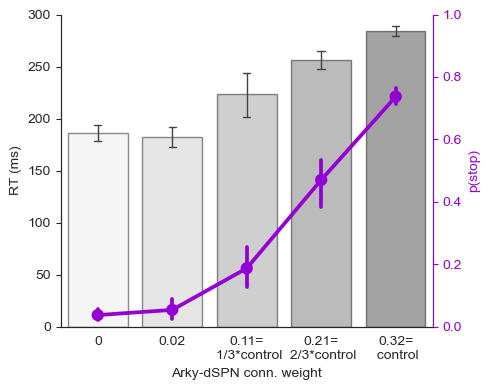

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statannot import add_stat_annotation
#from statannotcolor.Annotator import Annotator


fig, ax1 = plt.subplots(figsize=(5, 4), tight_layout=True)
sns.set_style("white")

#col_order = ['0', '0.02', '0.11', '0.21', '0.32']
col_order = ['0', '0.02', '0.04', '0.08', '0.12']
#col_order = ['0', '0.09', '0.12', '0.18', '0.22', '0.28']
#col_order=['control', 'stim']

sns.barplot(data=rts_average_wts, x='GPeA', y='rt', errorbar=('ci', 95),
            capsize=.1, errwidth=1.,
            palette="Greys", edgecolor='k', alpha=0.45, ax=ax1)

#test_results = add_stat_annotation(ax1, data=temp_rt, order=col_order,
                                  # box_pairs=[('control', 'stim')],
                                   #test='t-test_paired', text_format='star',
                                   #loc='outside', verbose=1, color='grey', linewidth=.7)

ax1.set_xlabel('Arky-dSPN conn. weight')
ax1.set_ylabel('RT (ms)')
#ax1.set_xticks(puntos_x)
#ax1.set_xticklabels(categorias)
#ax1.tick_params(axis='y', labelcolor='b')
# Crear el segundo gráfico de barras (eje derecho)
ax2 = ax1.twinx()
sns.pointplot(data=p_stop_average_wts, x='GPeA', y='p_stop', 
              errorbar=('ci', 95), color='darkviolet', ax=ax2)

#test_results = add_stat_annotation(ax2, data=temp, order=col_order,
                                  # box_pairs=[('control', 'stim')],
                                  # test='t-test_paired', text_format='star',
                                   #loc='inside', verbose=1, color='grey', linewidth=.7)


ax2.set_ylim(0,1)
ax1.set_ylim(0,300)
ax2.set_ylabel('p(stop)')
# Mostrar el gráfico
ax1.spines[['top']].set_visible(False)
ax2.spines[['top']].set_visible(False)
#ax1.set_xticklabels(['0.0433=\n 2/3*control','0.06', '0.063', '0.065=\n control'])
ax1.set_xticklabels(['0', '0.02','0.11=\n 1/3*control', '0.21=\n 2/3*control', 
                     '0.32=\n control'])
#ax1.set_xticklabels(['0', '0.02', '0.04=\n 1/3*control', '0.08=\n 2/3*control', '0.12=\n  control'])
#ax2.set_xticklabels(['0', '0.09= \n 1/3*control', '0.12', '0.18= \n 2/3*control', 
                    # '0.22', '0.28= \n control'])
#ax2.set_xticklabels(['control', 'lesion'])

ax2.spines['right'].set_color('darkviolet')
ax2.yaxis.label.set_color('darkviolet') #brown
ax2.tick_params(axis='y', colors='darkviolet')

# Agregar la etiqueta entre los puntos
#plt.annotate(r'$\Delta \sim 17\% $', (0, 0.85), xytext=(0.4, 0.65), color='r')
#plt.annotate(r'$\Delta \sim 13\% $', (0, 0.75), xytext=(0.4, 0.75), color='r')

plt.savefig(figure_dir_new+'pstop_rts_GPeA-dSPN', dpi=200)
plt.show()

In [244]:
np.round(1.921e-03,5)

0.00192

### Statistics

#### p(stop)

In [62]:
temp

,seed,control,stim
0,0,0.666667,0.566667
1,1,0.700000,0.500000
2,2,0.700000,0.633333
3,3,0.666667,0.600000
4,4,0.700000,0.500000
5,5,0.733333,0.566667
6,6,0.700000,0.400000
7,7,0.700000,0.466667
8,8,0.700000,0.500000
9,9,0.700000,0.566667


In [272]:
from sklearn.metrics import mean_squared_error
#N = number of observations
#N - seeds or number of trials? 
delta = temp['0.32']-temp['0']
delta

0    0.666667
1    0.666667
2    0.700000
3    0.733333
4    0.733333
5    0.633333
6    0.800000
7    0.600000
8    0.733333
9    0.733333
dtype: float64

In [273]:
N = len(delta)
delta_mean = np.mean(delta)
delta_std = delta.std()
diff = delta_std/np.sqrt(N)
diff

0.018592445034090573

In [274]:
sem_p_stop_delta = delta.sem()
sem_p_stop_delta

0.018592445034090573

In [275]:
sem_p_stop = temp.sem()
sem_p_stop

seed    0.957427
0.32    0.013563
0.21    0.041410
0.11    0.033775
0.02    0.017356
0       0.009230
dtype: float64

In [276]:
temp.mean()

seed    4.500000
0.32    0.736667
0.21    0.470000
0.11    0.186667
0.02    0.053333
0       0.036667
dtype: float64

In [82]:
import scipy 
scipy.stats.ttest_rel(temp['control'], temp['stim'])

TtestResult(statistic=4.435493442743906, pvalue=0.0016341125715700598, df=9)

In [279]:
temp

,seed,0.32,0.21,0.11,0.02,0
0,0,0.700000,0.566667,0.233333,0.033333,0.033333
1,1,0.700000,0.433333,0.333333,0.000000,0.033333
2,2,0.733333,0.466667,0.166667,0.100000,0.033333
3,3,0.733333,0.533333,0.133333,0.000000,0.000000
4,4,0.733333,0.533333,0.233333,0.066667,0.000000
5,5,0.700000,0.600000,0.133333,0.000000,0.066667
6,6,0.833333,0.133333,0.366667,0.166667,0.033333
7,7,0.700000,0.433333,0.033333,0.100000,0.100000
8,8,0.766667,0.533333,0.166667,0.033333,0.033333
9,9,0.766667,0.466667,0.066667,0.033333,0.033333


In [150]:
temp_t = temp.drop('seed', axis=1)
sem_p_stop_cols = temp_t.sem('columns')
sem_p_stop_cols

0    0.000000
1    0.083333
2    0.066667
3    0.116667
4    0.033333
5    0.083333
6    0.100000
7    0.083333
8    0.133333
9    0.016667
dtype: float64

#### RTs

In [83]:
temp_rt

,seed,control,stim
0,0,277.033333,283.866667
1,1,277.033333,267.7
2,2,298.8,282.466667
3,3,291.466667,280.5
4,4,298.8,282.766667
5,5,292.4,282.533333
6,6,270.433333,282.6
7,7,270.433333,282.4
8,8,278.133333,287.9
9,9,298.8,284.366667


In [281]:
from sklearn.metrics import mean_squared_error
delta_rt = temp_rt['0.32']-temp_rt['0']
N = len(delta_rt)
delta_mean = np.mean(delta_rt)
std_delta_rt = delta_rt.std()
diff_rt = std_delta_rt/np.sqrt(N)
diff_rt

6.0022367230068765

In [282]:
sem_rt_delta = delta_rt.sem()
sem_rt_delta

6.0022367230068765

In [283]:
sem_rt = temp_rt.sem()
sem_rt

seed     0.957427
0.32     2.600822
0.21     4.893512
0.11    10.890718
0.02     5.059361
0        4.172398
dtype: object

In [284]:
temp_rt.mean()

seed           4.5
0.32    283.676667
0.21        256.67
0.11        223.39
0.02    182.633333
0       186.326667
dtype: object

In [84]:
import scipy 
scipy.stats.ttest_rel(temp_rt['control'], temp_rt['stim'])

TtestResult(statistic=0.9394028020065992, pvalue=0.3720500226342278, df=9)

1e-05

## Firing difference

In [355]:
importlib.reload(plt_help)
importlib.reload(plt_func)
importlib.reload(post_help)

<module 'common.postprocessing_helpers' from '/Users/cristina/Desktop/CBGTpy_sonoma/CBGTPy/notebooks/../common/postprocessing_helpers.py'>

In [423]:
data_dir = "../Results/Data_results/weights_analysis/lesion-experiments/"
figure_dir = "../Results/Figures_results/weights_analysis/lesion-experiments/"

In [442]:
#solutions_seed = [0, 5]
#solutions = [0.065, 0.063]
#solutions = [0.065, 0.063, 0.060, 0.065*2/3, 0.065*1/3]
#solutions = [0.065, 0.063, 0.060, 0.0593, 0.0513, 0.065*2/3]
#solutions = [0.12, 0.08, 0.04, 0.02, 0]
solutions = [0.32, np.round(0.32*2/3, 2), np.round(0.32*1/3, 2), 0.02, 0]
#solutions = [0, 0.4]
#solutions = [0.28, 0.22, 0.18, 0.12, 0.09, 0]
print(len(solutions))
print(solutions)

5
[0.32, 0.21, 0.11, 0.02, 0]


In [443]:
firing = pd.DataFrame()

input_channels = ['CxI_common', 'Cx_left', 'D1STR_left','D2STR_left',
                  'FSI_common', 'GPeP_left','GPeA_left','GPi_left', 
                  'STNE_left', 'Th_left']


for i in np.arange(len(solutions)): 
    
    net = pickle.load(open(data_dir+'GPeA-dSPN/network_data_GPeA-dSPN_weak_'+str(i), 'rb'))
    
    for j in np.arange(len(net)):

        helper = plt_help.rename_columns(net[j])['popfreqs']
        #print(helper)
        
        datatabs = net[j]['datatables']
        stim_start,dec_time = datatabs['stimulusstarttime']+int(70.), datatabs['decisiontime'] #datatabs['stimulusstarttime']+int(70.)+145 #datatabs['decisiontime'] #  ##datatabs['stimulusstarttime']+int(70.)+145 
        
        #print('start: ', stim_start)
        #print('end:', dec_time)
        
        temp = dict()
        temp["reaction_time"] = []
        for k,(ss,dt) in enumerate(zip(stim_start,dec_time)):
            temp["reaction_time"] = [*temp["reaction_time"], dt-ss]  
            #temp["reaction_time"] = pd.concat([temp["reaction_time"], dt-ss])
            #temp["reaction_time"].append(dt-ss)
            for ip_ch in input_channels:
                dat_slice = helper.loc[(helper["Time (ms)"] >=ss) & (helper["Time (ms)"] <=dt)][ip_ch]
                #print(dat_slice)
                if ip_ch not in temp.keys():
                    temp[ip_ch] = []
                #temp[ip_ch].append(dat_slice.mean())
                temp[ip_ch] = [*temp[ip_ch], dat_slice.mean()]  
        #print(temp)

        temp = pd.DataFrame(temp)
        #print(solutions[i])
        temp['GPeA-dSPN'] = solutions[i]
        temp['seed'] = j
        #firing = firing.append(temp, ignore_index=True)
        firing = pd.concat([firing, temp], ignore_index=True)
        
firing['GPeA-dSPN'] = np.round(firing['GPeA-dSPN'].values, 4)
#saveresults_vars(firing, data_dir+'STNstim-GPeAoff/firing')

In [444]:
average_firing = pd.DataFrame(firing.groupby(['GPeA-dSPN', 'seed'])[['CxI_common', 
              'Cx_left', 'D1STR_left', 'D2STR_left', 'FSI_common', 
              'GPeP_left', 'GPeA_left', 'GPi_left', 'STNE_left', 'Th_left']].mean()).reset_index()
#p_stop_average_wts = p_stop_average_wts.rename({'num_stops': 'p_stop'}, axis=1)
#saveresults_vars(p_stop_average_wts, data_dir+'GPeA-iSPN/p_stop_average_STN-GPi_wts')
average_firing

,GPeA-dSPN,seed,CxI_common,Cx_left,D1STR_left,D2STR_left,FSI_common,GPeP_left,GPeA_left,GPi_left,STNE_left,Th_left
0,0.00,0,9.697389,45.843894,8.083564,16.885323,17.545229,43.371839,26.899453,77.334454,30.075204,22.066080
1,0.00,1,9.741161,46.097958,7.615944,17.286264,17.625436,43.211104,28.247883,78.906047,30.014840,21.492166
2,0.00,2,9.699219,46.421798,7.454787,16.739476,17.709187,43.588147,26.722900,78.449282,29.474478,21.406259
3,0.00,3,9.813257,46.300309,7.219796,17.180455,17.703116,43.197550,26.820864,79.933984,29.838892,20.965134
4,0.00,4,9.471699,46.842797,8.221341,15.398514,17.811720,44.546048,22.226741,73.696106,28.718284,23.375212
5,0.00,5,9.486315,46.576374,7.323786,16.721897,17.862265,43.195597,27.557916,79.194723,29.641488,21.068303
6,0.00,6,9.373331,46.730558,7.653114,16.214566,17.764198,44.066075,26.141669,77.651727,29.269664,21.589397
7,0.00,7,9.423537,46.302742,8.216610,14.985099,17.626619,44.702815,21.214950,74.011653,28.732885,23.330043
8,0.00,8,9.408836,46.613481,7.406450,16.404709,17.861167,43.836201,25.688634,78.136682,29.201164,21.234149
9,0.00,9,9.531633,46.865194,7.710651,16.370411,17.907745,43.704933,25.986947,77.838994,29.654114,21.900466


In [ ]:
firing_on

In [445]:
firing_032 = pd.DataFrame()
firing_0 = pd.DataFrame()
firing_032 = average_firing[40:]
firing_0 = average_firing[0:10]
firing_032 = pd.DataFrame(firing_032.groupby(['GPeA-dSPN'])[['CxI_common', 
            'Cx_left', 'D1STR_left', 'D2STR_left', 'FSI_common', 
            'GPeP_left', 'GPeA_left', 'GPi_left', 'STNE_left', 'Th_left']].mean()).reset_index()
firing_0 = pd.DataFrame(firing_0.groupby(['GPeA-dSPN'])[['CxI_common', 
            'Cx_left', 'D1STR_left', 'D2STR_left', 'FSI_common', 
            'GPeP_left', 'GPeA_left', 'GPi_left', 'STNE_left', 'Th_left']].mean()).reset_index()

In [446]:
firing_all = pd.DataFrame()
firing_all = pd.concat([firing_032, firing_0], axis=0, ignore_index=True)
firing_all = firing_all.rename(index={1: "0.0", 0: "0.32 - control"})
firing_all = firing_all.drop('GPeA-dSPN', axis=1)
firing_all = firing_all.T
firing_all

,0.32 - control,0.0
CxI_common,9.889597,9.564638
Cx_left,45.035534,46.459510
D1STR_left,2.854648,7.690604
D2STR_left,17.840436,16.418671
FSI_common,17.098646,17.741668
GPeP_left,43.146781,43.742031
GPeA_left,32.390181,25.750796
GPi_left,94.833063,77.515365
STNE_left,30.269196,29.462101
Th_left,13.781092,21.842721


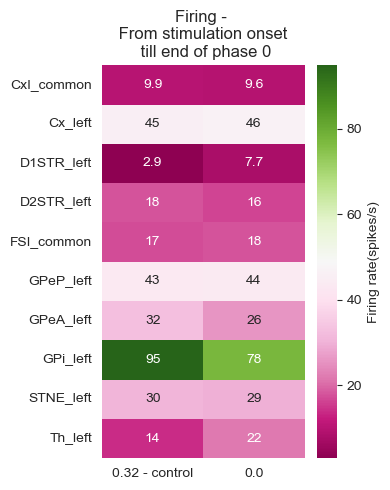

In [447]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1, figsize=(4, 5), tight_layout=True) #4
#sns.pointplot(data=datatables_D1, x='GPeA-D1', y='num_stops', errorbar="sd", ax = ax, color='brown')
sns.heatmap(firing_all, cbar_kws={'label': 'Firing rate(spikes/s)'}, 
           annot=True, cmap="PiYG")
plt.title('Firing - \n From stimulation onset \n till end of phase 0') #
#plt.title('Firing - \n Stimulation window')
plt.savefig(figure_dir_new+'heatmap_firing_GPeA-dSPN', dpi=200)

In [448]:
firing_diff = pd.DataFrame()
firing_diff['diff'] = ((firing_all['0.0'].values - firing_all['0.32 - control'].values)/firing_all['0.32 - control'].values)*100
firing_diff = firing_diff.rename(index={0: "CxI_common", 1: "Cx_left", 2:'D1STR_left', 
              3: 'D2STR_left', 4:'FSI_common', 5:'GPeP_left', 6: 'GPeA_left', 
              7: 'GPi_left', 8:'STNE_left', 9:'Th_left'})
firing_diff

,diff
CxI_common,-3.285866
Cx_left,3.161896
D1STR_left,169.406356
D2STR_left,-7.969337
FSI_common,3.760663
GPeP_left,1.379593
GPeA_left,-20.498141
GPi_left,-18.261244
STNE_left,-2.666388
Th_left,58.497750


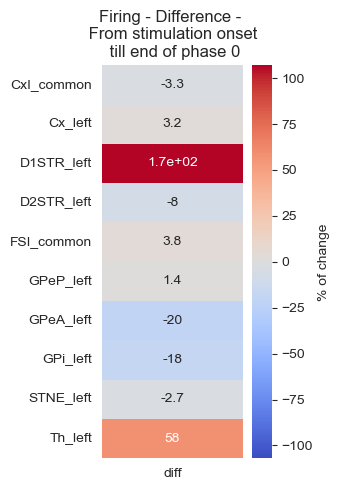

In [450]:
fig, ax = plt.subplots(1,1, figsize=(3.5, 5), tight_layout=True)

sns.heatmap(firing_diff, vmin=-107, vmax=107, annot=True, cmap="coolwarm", 
            cbar_kws={'label': '% of change'})

plt.title('Firing - Difference - \n From stimulation onset \n till end of phase 0')
#plt.xlabel('(0.063 - 0.065)')
#plt.title('Firing - Difference -\nStimulation window')
plt.savefig(figure_dir_new+'heatmap_firingGPeAstim_diff_GPeA-dSPN', dpi=200)